## 1.1 GoggleDrive Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


## 1.2 Preproceese File Load from Drive

흑백으로 전처리된 Nparray를 Drive에서 불러온다

In [4]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm

train_x = np.load('./preprocessed/train_x.npy')
train_y = np.load('./preprocessed/train_y.npy')
val_x = np.load('./preprocessed/val_x.npy')
val_y = np.load('./preprocessed/val_y.npy')
test_x = np.load('./preprocessed/test_x.npy')
test_y = np.load('./preprocessed/test_y.npy')

## 1.3 one-hot Encoding

In [5]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

def one_hot_encoding(x_label):
    # 라벨 인코더 생성
    encoder = LabelEncoder()
    # X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
    encoder.fit(x_label)
    y = encoder.transform(x_label)
    y = to_categorical(y)
    return y


In [6]:
train_y = one_hot_encoding(train_y)
val_y = one_hot_encoding(val_y)
test_y = one_hot_encoding(test_y)

# 2.Modeling - Resnet50 , Full_layer , Optimizer = SGD , Epoch = 10

In [27]:
import os
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import  ModelCheckpoint
from model import nets


In [28]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.33
session = InteractiveSession(config = config)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [30]:
checkpoint_path = "Resnet50_Epoch10/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [31]:
video_input = Input(shape=(64, 128, 128, 1))

model = nets.network['resnet50'](video_input, num_classes=4)
model.compile(loss=categorical_crossentropy,
              optimizer='sgd', metrics=['accuracy'])


In [ ]:
model.summary()

In [32]:
batch=16
epoch =10

## 2.2 Training & Evalutate

In [33]:
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=batch,
                        epochs=epoch, verbose=1, shuffle=True,callbacks=[cp_callback])

Epoch 1/10
219/219 [==============================] - 89s 311ms/step - loss: 3.3670 - accuracy: 0.2946 - val_loss: 1.4376 - val_accuracy: 0.3000

Epoch 00001: saving model to Resnet50_Epoch10/cp.ckpt
Epoch 2/10
219/219 [==============================] - 66s 302ms/step - loss: 1.6730 - accuracy: 0.4169 - val_loss: 8.5596 - val_accuracy: 0.3690

Epoch 00002: saving model to Resnet50_Epoch10/cp.ckpt
Epoch 3/10
219/219 [==============================] - 66s 302ms/step - loss: 1.2874 - accuracy: 0.5521 - val_loss: 2.8081 - val_accuracy: 0.3930

Epoch 00003: saving model to Resnet50_Epoch10/cp.ckpt
Epoch 4/10
219/219 [==============================] - 66s 302ms/step - loss: 0.8804 - accuracy: 0.7163 - val_loss: 3.4532 - val_accuracy: 0.3020

Epoch 00004: saving model to Resnet50_Epoch10/cp.ckpt
Epoch 5/10
219/219 [==============================] - 66s 302ms/step - loss: 0.5688 - accuracy: 0.8203 - val_loss: 5.1186 - val_accuracy: 0.3160

Epoch 00005: saving model to Resnet50_Epoch10/cp.ckpt


In [34]:
loss,accuracy =model.evaluate(test_x, test_y, verbose=1)
print(loss,accuracy)

16/16 [==============================] - 3s 153ms/step - loss: 3.9600 - accuracy: 0.4020
3.959986686706543 0.4020000100135803


## 3. 분석

### 1) 혼동행렬(confusion metrix)

In [35]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_hat = model.predict(test_x)
y_hat = np.argmax(y_hat, axis=1)
y_test = np.argmax(test_y,axis=1)
conf_mat = confusion_matrix(y_test, y_hat)
conf_mat


array([[47, 12, 39, 52],
       [44, 20, 13, 23],
       [42,  5, 38, 15],
       [19, 24, 11, 96]])

### 2) Training& Validation Accuracy

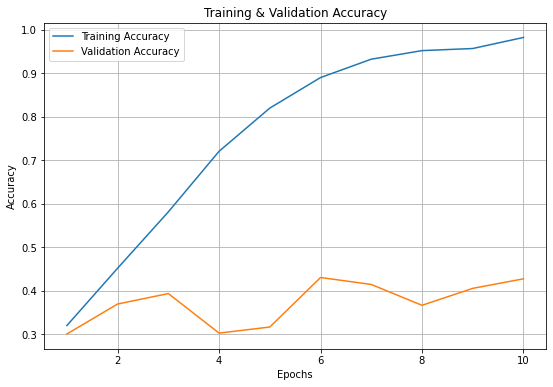

In [36]:
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

### 3) Training & Validatation Loss

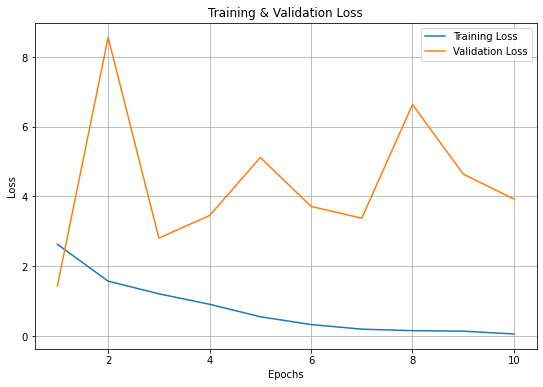

In [37]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()